In [31]:
import pandas as pd

# Ganti 'nama_file.csv' dengan nama file CSV yang sesuai
nama_file_csv = 'pengangguran.csv'

# Membaca data dari file CSV
data = pd.read_csv(nama_file_csv, encoding='ISO-8859-1')

# Menampilkan beberapa baris pertama dari data untuk verifikasi
print(data.head())


         Provinsi  Tingkat Pengangguran Terbuka (TPT) - Februari  \
0            Aceh                                           5.97   
1  Sumatera Utara                                           5.47   
2  Sumatera Barat                                           6.17   
3            Riau                                           4.40   
4           Jambi                                           4.70   

   Tingkat Pengangguran Terbuka (TPT) - Agustus  \
0                                          6.17   
1                                          6.16   
2                                          6.28   
3                                          4.37   
4                                          4.59   

   Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari  \
0                                              64.15      
1                                              70.45      
2                                              68.00      
3                                              6

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provinsi                                              35 non-null     object 
 1   Tingkat Pengangguran Terbuka (TPT) - Februari         35 non-null     float64
 2   Tingkat Pengangguran Terbuka (TPT) - Agustus          35 non-null     float64
 3   Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari  35 non-null     float64
 4   Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus   35 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.5+ KB


In [33]:
data.isnull().sum()

Provinsi                                                0
Tingkat Pengangguran Terbuka (TPT) - Februari           0
Tingkat Pengangguran Terbuka (TPT) - Agustus            0
Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari    0
Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus     0
dtype: int64

In [34]:
data.shape

(35, 5)

In [35]:
# from sklearn.preprocessing import MinMaxScaler

# # Pilih kolom yang akan dinormalisasi (misalnya, semua kecuali kolom Tanggal (GMT))
# cols_to_normalize = data.columns[1:]

# # Inisialisasi MinMaxScaler
# scaler = MinMaxScaler()

# # Normalisasi kolom-kolom tertentu
# data[cols_to_normalize] = scaler.fit_transform(data[cols_to_normalize])

# # Save the normalized data to a new CSV file
# data.to_csv('normalized_data.csv', index=False)


In [36]:
# # Membaca data dari file CSV
# data1= pd.read_csv("normalized_data.csv")

# # Menampilkan beberapa baris pertama dari data untuk verifikasi
# print(data1.head())

Elbow Method:

Metode ini melibatkan pengamatan sumbu-bahu (elbow) pada grafik inersia (inertia) terhadap jumlah cluster. Inersia adalah suatu ukuran seberapa jauh setiap titik dalam suatu klaster dari pusat klasternya. Semakin kecil inersia, semakin baik. Pada grafik inersia terhadap jumlah cluster, "siku" dari elbow adalah tempat di mana penurunan inersia mulai melambat secara signifikan. Jumlah cluster pada "siku" ini dapat dianggap sebagai jumlah cluster yang optimal

c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

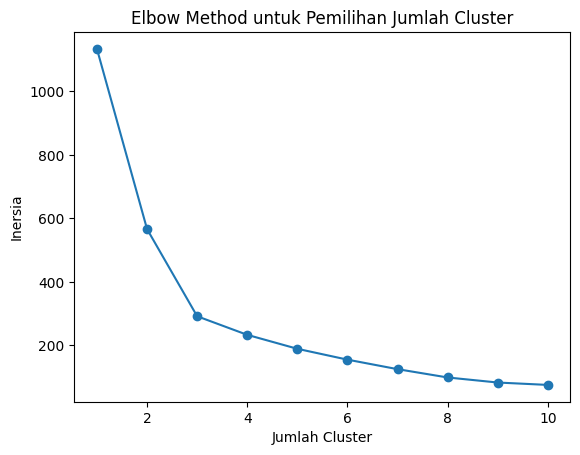

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Contoh data1 (gunakan data1 yang sudah dinormalisasi)
X = data[["Tingkat Pengangguran Terbuka (TPT) - Februari", "Tingkat Pengangguran Terbuka (TPT) - Agustus", "Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari", "Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus"]]

# Kumpulan jumlah cluster yang akan diuji
num_clusters = range(1, 11)

# Simpan inersia untuk setiap jumlah cluster
inertia = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot grafik inersia terhadap jumlah cluster
plt.plot(num_clusters, inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia')
plt.title('Elbow Method untuk Pemilihan Jumlah Cluster')
plt.show()


Metode Silhouette:

Metode Silhouette mengukur seberapa baik objek dalam satu klaster mirip satu sama lain dan seberapa terpisah klaster satu sama lain. Nilai Silhouette berkisar dari -1 hingga 1. Nilai yang lebih tinggi menunjukkan cluster yang lebih baik. Pilih jumlah cluster yang memberikan nilai Silhouette tertinggi.

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Contoh data (gunakan data yang sudah dinormalisasi)
X = data[["Tingkat Pengangguran Terbuka (TPT) - Februari", "Tingkat Pengangguran Terbuka (TPT) - Agustus", "Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari", "Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus"]]

# Pilih jumlah cluster yang diinginkan (misalnya, 2)
num_clusters = 3

# Inisialisasi dan fit KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)

kmeans.fit(X)

# Hitung nilai Silhouette
score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.4457554496981945


c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


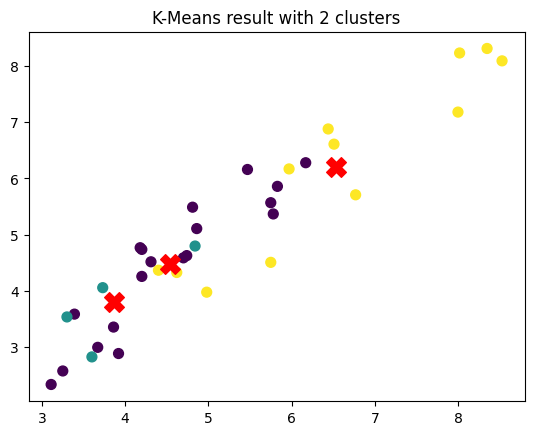

Cluster means:
   Tingkat Pengangguran Terbuka (TPT) - Februari  \
0                                       4.536842   
1                                       3.867500   
2                                       6.528333   

   Tingkat Pengangguran Terbuka (TPT) - Agustus  \
0                                      4.479474   
1                                      3.807500   
2                                      6.197500   

   Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari  \
0                                          69.626316      
1                                          76.427500      
2                                          64.885000      

   Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus  
0                                          69.362105    
1                                          75.610000    
2                                          65.183333    

Clustering vector:
[2 0 0 2 0 0 0 0 0 2 2 2 0 1 0 2 1 0 1 0 0 0 2 2 2 0 2 0 0 0 2 2 0 1 0]

Within cluste

In [39]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(X)

# Get cluster assignments
cluster_assignments = kmeans.labels_

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Plotting K-Means results
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_assignments, cmap='viridis', marker='o', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', marker='X')
plt.title('K-Means result with 2 clusters')
plt.show()

# Displaying cluster means
cluster_means = pd.DataFrame(cluster_centers, columns=X.columns)
print("Cluster means:")
print(cluster_means)

# Displaying clustering vector
print("\nClustering vector:")
print(cluster_assignments)

# Displaying within cluster sum of squares by cluster
within_cluster_sumsquares = kmeans.inertia_
print("\nWithin cluster sum of squares by cluster:")
print(within_cluster_sumsquares)

# Displaying additional information
print("\nAvailable components:")
print(kmeans)


In [40]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0])